<a href="https://colab.research.google.com/github/prasanth1367/arrayelements/blob/master/12345_updated__final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.read_csv('clustering.csv')
data.head()




,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


Text(0.5, 0, 'CoapplicantIncome')

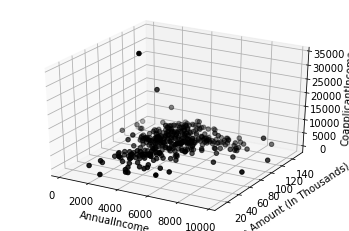

In [3]:
X = data[["LoanAmount","ApplicantIncome","CoapplicantIncome"]]
#Visualise data points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X["ApplicantIncome"],X["LoanAmount"],X["CoapplicantIncome"],c='black')
ax.set_xlabel('AnnualIncome')
ax.set_ylabel('Loan Amount (In Thousands)')
ax.set_zlabel('CoapplicantIncome')

     LoanAmount  ApplicantIncome  CoapplicantIncome
365        36.0             3166                0.0
318       100.0             3159                0.0
305       113.0             3095                0.0
101       129.0             2439             3333.0


Text(0.5, 0, 'CoapplicantIncome')

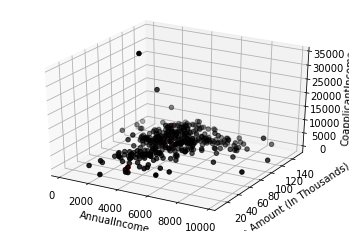

In [4]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=4

# Select random observation as centroids
Centroids = (X.sample(n=K))
print(Centroids)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X["ApplicantIncome"],X["LoanAmount"],X["CoapplicantIncome"],c='black')
ax.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],Centroids["CoapplicantIncome"],c='red')
ax.set_xlabel('AnnualIncome')
ax.set_ylabel('Loan Amount (In Thousands)')
ax.set_zlabel('CoapplicantIncome')


In [5]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d3=(row_c["CoapplicantIncome"]-row_d["CoapplicantIncome"])
            d=np.sqrt(d1+d2+d3)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome","CoapplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()+ (Centroids_new['CoapplicantIncome'] - Centroids['CoapplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome","CoapplicantIncome"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


62.904181160940425
356.7096270490108
201.03469299570548
342.72820538128525
243.8751669526942
164.57691443448658
107.9050332983029
197.19638672625558
166.33475073098498
137.24531119134699
117.33686322646383
58.49115818340195
19.06269823140113
26.147089621607464
45.374803247502655
54.92118958747574
112.36139216837799
71.00492880316042
0.9040417031752668
0.0


Text(0.5, 0, 'CoapplicantIncome')

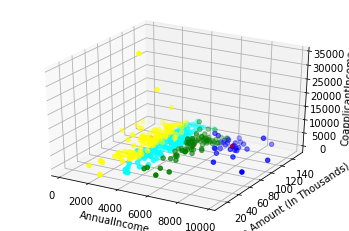

In [10]:
color=['blue','green','cyan','yellow']
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
for k in range(K):
  
    data=X[X["Cluster"]==k+1]
    ax.scatter(data["ApplicantIncome"],data["LoanAmount"],data["CoapplicantIncome"],c=color[k])
ax.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],Centroids["CoapplicantIncome"],c='red')
ax.set_xlabel('AnnualIncome')
ax.set_ylabel('Loan Amount (In Thousands)')
ax.set_zlabel('CoapplicantIncome')

